In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import UnivariateSpline
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
from scipy import stats
from matplotlib import colors as mcolors

In [5]:
#Arrays (datos de Excel, desde listas en archivos de texto)
cfp=np.fromfile('CFPA3', sep=',')
rfp=np.fromfile('RFPA3', sep=',')
yfp=np.fromfile('YFPA3', sep=',')
od=np.fromfile('ODA3', sep=',')
tt=np.fromfile('t', sep=',')
print(cfp.shape)
print(rfp.shape)
print(yfp.shape)
print(od.shape)
print(tt.shape)

(97,)
(97,)
(97,)
(97,)
(97,)


In [6]:
def F_sigma(t, A, um,l):
    return ((A*np.exp(-np.exp((((um*np.exp(1))/A)*(l-t))+1))))

def Function_fit(xdata,ydata,init,end,func=F_sigma,ParamBounds=([0,0,0],[3,1,300])):
        Y_fit={}

        z,_=curve_fit(func,xdata[init:end], ydata[init:end],bounds=ParamBounds)

        print(z)

        evalF=func(xdata,z[0],z[1],z[2])

        plt.plot(xdata, ydata, '.',xdata, evalF, '-')

        plt.title('')

        plt.show()

        Y_fit=evalF,z

        return(Y_fit)


Min OD = 8.300000e-02
[  2.34835880e+00   9.96134182e-03   1.92765223e+02]


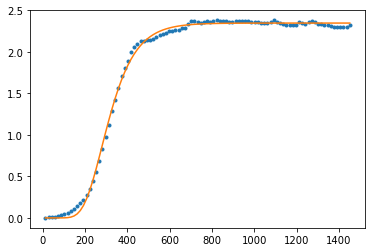

A=2.348359e+00
um=9.961342e-03
l=1.927652e+02
Tm=2.794918e+02
doubpe=6.958372e+01
ext=1.739593e+02
Tfinal=4.534511e+02


In [7]:
#Ajuste de datos con modelo Gompertz y obtención de parámetros para el ajuste
#Function_fit(xdata,ydata,init,end,func=F_sigma,ParamBounds=([1,-np.inf,0.1],[np.inf,-1,1]))

y = np.log(od)-np.log(np.min(od))
print('Min OD = %e'%((np.min(od))))

evaly, params=Function_fit(tt,y,0,-1)
A = params[0]
um=params[1]
l=params[2]
print('A=%e'%(A))
print('um=%e'%(um))
print('l=%e'%(l))

#Cálculo datos para determinar extensión de la fase exponencial
tm=((A/(np.exp(1)*um))+l)
print('Tm=%e'%(tm))
t2=((np.log(2))/um)
print('doubpe=%e'%(t2))
extdp=2.5*t2
print('ext=%e'%extdp)
ttot=tm+extdp
print('Tfinal=%e'%ttot)

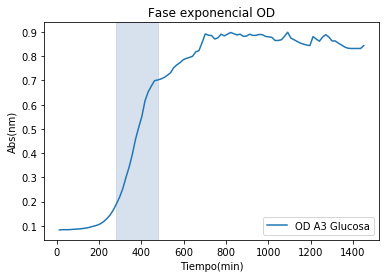

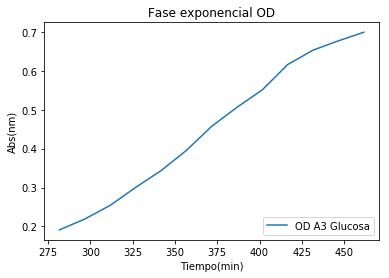

In [9]:
#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[18]
y2=tt[31]
plt.figure()
plt.title('Fase exponencial OD')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od,label='OD A3 Glucosa')
plt.axvspan(y1,y2, color='lightsteelblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo
plt.figure()
plt.title('Fase exponencial OD')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[18:31],od[18:31],label='OD A3 Glucosa')
plt.legend(loc='lower right')

A=2.348359e+00
um=9.961342e-03
l=1.927652e+02


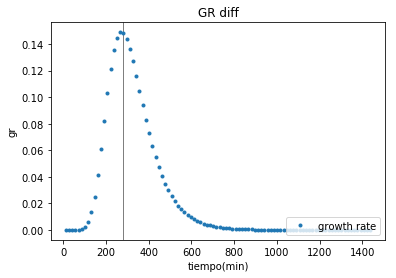

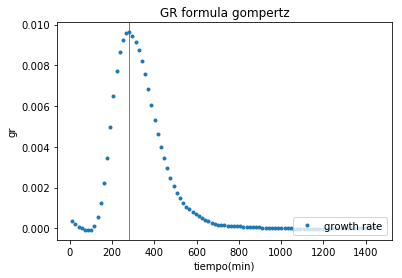

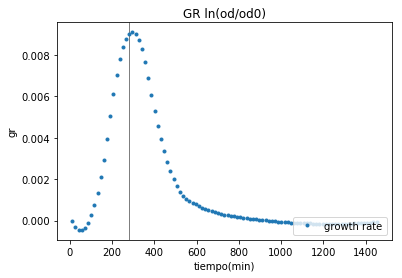

In [51]:
#tasa de crecimiento
print('A=%e'%(A))
print('um=%e'%(um))
print('l=%e'%(l))
y=((A*np.exp(-np.exp((((um*np.exp(1))/A)*(l-tt))+1))))
#Con diff
dy=np.diff(y)
plt.figure()
plt.title('GR diff')
plt.xlabel('tiempo(min)')
plt.ylabel('gr')
plt.axvspan(tm,tm, color='k', alpha=0.5)
plt.plot(tt[:-1],dy,'.',label='growth rate')
plt.legend(loc='lower right')

#con spline e y=((A*np.exp(-np.exp((((um*np.exp(1))/A)*(l-tt))+1))))
spl=UnivariateSpline(tt,y)
spl.set_smoothing_factor(1e-3)
dydtt=spl.derivative(1)(tt)
plt.figure()
plt.title('GR formula gompertz')
plt.xlabel('tiempo(min)')
plt.ylabel('gr')
plt.axvspan(tm,tm, color='k', alpha=0.5)
plt.plot(tt,dydtt,'.',label='growth rate')
plt.legend(loc='lower right')

#con spline e y2=np.log(od)-np.log(np.min(od))
y2=np.log(od)-np.log(np.min(od))
spl2=UnivariateSpline(tt,y2)
spl2.set_smoothing_factor(1e-1)
dydt2=spl2.derivative(1)(tt)
plt.figure()
plt.title('GR ln(od/od0)')
plt.xlabel('tiempo(min)')
plt.ylabel('gr')
plt.axvspan(tm,tm, color='k', alpha=0.5)
plt.plot(tt,dydt2,'.',label='growth rate')
plt.legend(loc='lower right')

slope=3.322716e+04
intercept=2.485664e+03
p-value=1.836109e-08
r-squared: 0.949184901817
std_err=2.318023e+03
y=(3.322716e+04)x+(2.485664e+03)


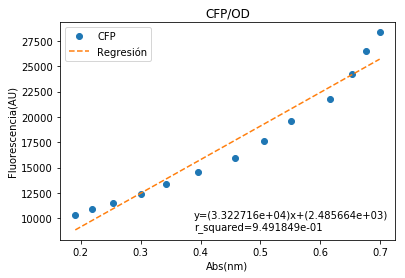

In [19]:
c=cfp[18:31]
r=rfp[18:31]
y=yfp[18:31]
o=od[18:31]
t=tt[18:31]

slope, intercept, r_value, p_value,std_err=stats.linregress(o,c)
slopecfp=slope
print('slope=%e'%slopecfp)
print('intercept=%e'%intercept)
print('p-value=%e'%p_value)
print("r-squared:",r_value**2)
print('std_err=%e'%std_err)

regcfp=((slope*o)+intercept)
print('y=(%e)x+(%e)'%(slope, intercept))
regcfpstr=('y=(%e)x+(%e)'%(slope, intercept))
crval2='r_squared=%e'%(r_value**2)

plt.figure()
plt.title('CFP/OD')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(o,c,'o',label='CFP')       
plt.plot(o,regcfp,'--',label='Regresión')
plt.annotate(str(regcfpstr), xy=(0.4, 0.1), xycoords='axes fraction')
plt.annotate(str(crval2),xy=(0.4,0.05),xycoords='axes fraction')
plt.legend(loc='upper left')


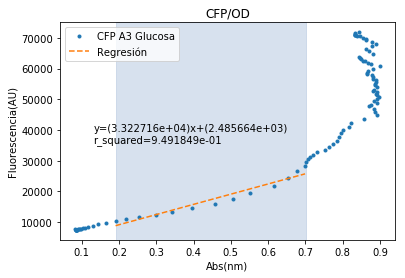

In [11]:
#Delimitacion datos en CFP/OD
y1=od[18]
y2=od[31]
plt.figure()
plt.title('CFP/OD')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(od,cfp,'.',label='CFP A3 Glucosa')
plt.axvspan(y1,y2, color='lightsteelblue', alpha=0.5)
plt.plot(o,regcfp,'--',label='Regresión')
plt.annotate(str(regcfpstr), xy=(0.1, 0.5), xycoords='axes fraction')
plt.annotate(str(crval2),xy=(0.1,0.45),xycoords='axes fraction')
plt.legend(loc='upper left')

slope=2.780224e+04
intercept=1.597893e+04
p-value=8.230707e-10
r-squared: 0.971054894873
std_err=1.447269e+03
y=(2.780224e+04)x+(1.597893e+04)


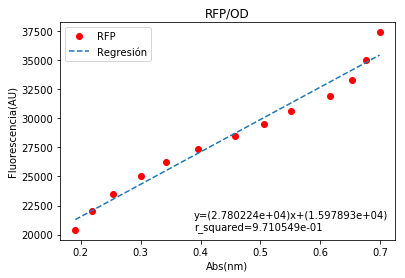

In [20]:
slope, intercept, r_value, p_value,std_err=stats.linregress(o,r)
sloperfp=slope
print('slope=%e'%sloperfp)
print('intercept=%e'%intercept)
print('p-value=%e'%p_value)
print("r-squared:",r_value**2)
print('std_err=%e'%std_err)

regrfp=((slope*o)+intercept)
print('y=(%e)x+(%e)'%(slope, intercept))
regrfpstr=('y=(%e)x+(%e)'%(slope, intercept))
rrval2='r_squared=%e'%(r_value**2)

plt.figure()
plt.title('RFP/OD')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(o,r,'ro',label='RFP')       
plt.plot(o,regrfp,'--',label='Regresión')
plt.annotate(str(regrfpstr), xy=(0.4, 0.1), xycoords='axes fraction')
plt.annotate(str(rrval2),xy=(0.4,0.05),xycoords='axes fraction')
plt.legend(loc='upper left')

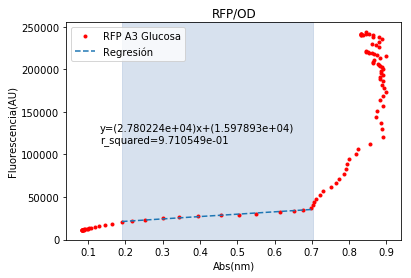

In [13]:
#Delimitacion datos en RFP/OD
y1=od[18]
y2=od[31]
plt.figure()
plt.title('RFP/OD')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(od,rfp,'r.',label='RFP A3 Glucosa')
plt.axvspan(y1,y2, color='lightsteelblue', alpha=0.5)
plt.plot(o,regrfp,'--',label='Regresión')
plt.annotate(str(regrfpstr), xy=(0.1, 0.5), xycoords='axes fraction')
plt.annotate(str(rrval2),xy=(0.1,0.45),xycoords='axes fraction')
plt.legend(loc='upper left')

slope=1.593086e+05
intercept=2.509434e+04
p-value=5.904350e-11
r-squared: 0.982056704694
std_err=6.492704e+03
y=(1.593086e+05)x+(2.509434e+04)


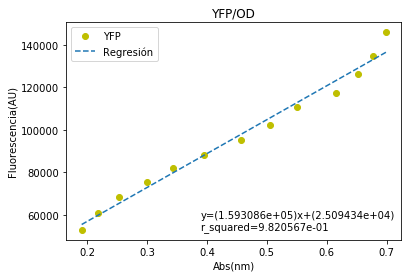

In [21]:
slope, intercept, r_value, p_value,std_err=stats.linregress(o,y)
slopeyfp=slope
print('slope=%e'%slopeyfp)
print('intercept=%e'%intercept)
print('p-value=%e'%p_value)
print("r-squared:",r_value**2)
print('std_err=%e'%std_err)

regyfp=((slope*o)+intercept)
print('y=(%e)x+(%e)'%(slope, intercept))
regyfpstr=('y=(%e)x+(%e)'%(slope, intercept))
yrval2='r_squared=%e'%(r_value**2)

plt.figure()
plt.title('YFP/OD')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(o,y,'yo',label='YFP')       
plt.plot(o,regyfp,'--',label='Regresión')
plt.annotate(str(regyfpstr), xy=(0.4, 0.1), xycoords='axes fraction')
plt.annotate(str(yrval2),xy=(0.4,0.05),xycoords='axes fraction')
plt.legend(loc='upper left')

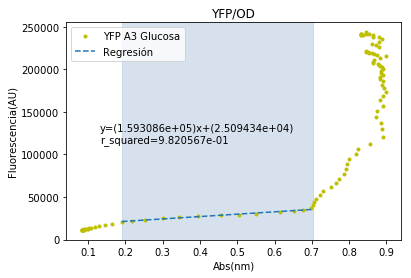

In [15]:
#Delimitacion datos en YFP/OD
y1=od[18]
y2=od[31]
plt.figure()
plt.title('YFP/OD')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(od,rfp,'y.',label='YFP A3 Glucosa')
plt.axvspan(y1,y2, color='lightsteelblue', alpha=0.5)
plt.plot(o,regrfp,'--',label='Regresión')
plt.annotate(str(regyfpstr), xy=(0.1, 0.5), xycoords='axes fraction')
plt.annotate(str(yrval2),xy=(0.1,0.45),xycoords='axes fraction')
plt.legend(loc='upper left')

([<matplotlib.axis.XTick at 0x1df9220a400>,
 <a list of 3 Text xticklabel objects>)

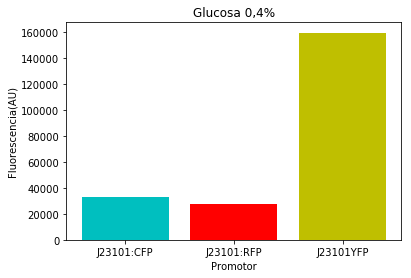

In [37]:
pendientes= [slopecfp,sloperfp,slopeyfp]
X = [1,2,3]
plt.figure()
plt.title('Glucosa 0,4%')
plt.xlabel('Promotor')
plt.ylabel('Fluorescencia(AU)')
plt.bar(X[0],pendientes[0],color='c')
plt.bar(X[1],pendientes[1],color='r')
plt.bar(X[2],pendientes[2],color='y')
plt.xticks(X, ["J23101:CFP","J23101:RFP","J23101YFP"])

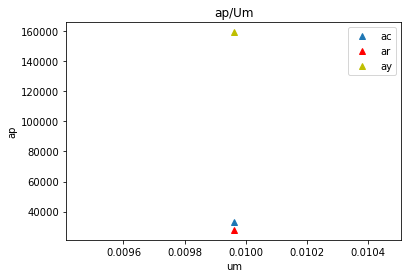

In [49]:
plt.figure()
plt.title('ap/Um')
plt.xlabel('um')
plt.ylabel('ap')
plt.plot(um,slopecfp,'^',label='ac')
plt.plot(um,sloperfp,'r^',label='ar')
plt.plot(um,slopeyfp,'y^',label='ay')
plt.legend()